In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('bmh')

In [3]:
def loadandresize(maxwidthheight, filename):
    f = Image.open(filename).convert(mode='L')
    fsize = f.size
    print(fsize)
    ratio = min(maxwidthheight/fsize[0], maxwidthheight/fsize[1])
    resultsize = (int(fsize[0]*ratio), int(fsize[1]*ratio))
    print(resultsize)
    return f.resize(resultsize)

(1650, 2550)
(776, 1200)


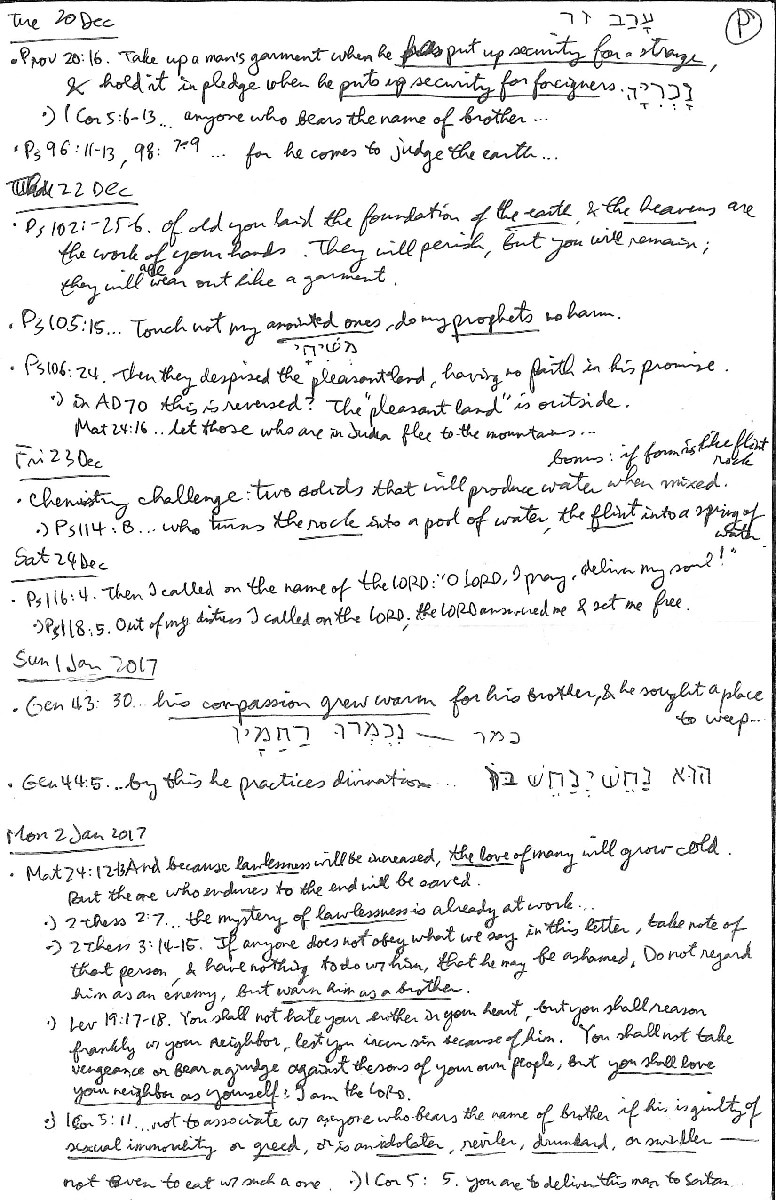

In [4]:
filename = "2016.05.OctDec.pdf-12.jpg"
baseimage = loadandresize(1200, filename)
width, height = baseimage.size
baseimage

In [5]:
data = baseimage.getdata()
base = np.array(data)
base.shape

(931200,)

In [6]:
base

array([ 63,  44,  41, ...,  35,   0, 255])

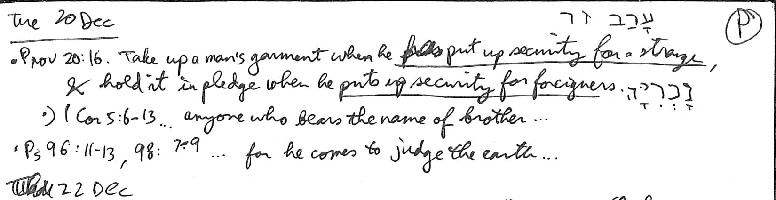

In [7]:
# 100 pixels.
n = 200
x = base[:width*n]
x = x.reshape(n, width).astype('uint8')
Image.fromarray(x)

In [8]:
def cut(image, coord1, coord2):
    x1, y1 = coord1
    x2, y2 = coord2
    width = image.width
    data = image.getdata()
    data = np.array(data)
    
    # Cut the rows.
    m = data[y1*width:y2*width]
    m = m.reshape(y2-y1, width).astype('uint8')
    
    # Cut the columns.
    m = np.delete(m, np.s_[x2::], 1)
    m = np.delete(m, np.s_[1:x1:], 1)
    
    return Image.fromarray(m)

In [9]:
x = cut(baseimage, (119,110), (123,135))
x = np.array(x.getdata())
x = pd.DataFrame(x)
x.describe()

,0
count,125.000000
mean,244.744000
std,40.977748
min,0.000000
25%,254.000000
50%,255.000000
75%,255.000000
max,255.000000


In [10]:
cut(baseimage, (171,110), (182,135))

In [11]:
x = cut(baseimage, (119,110), (123,135))
x

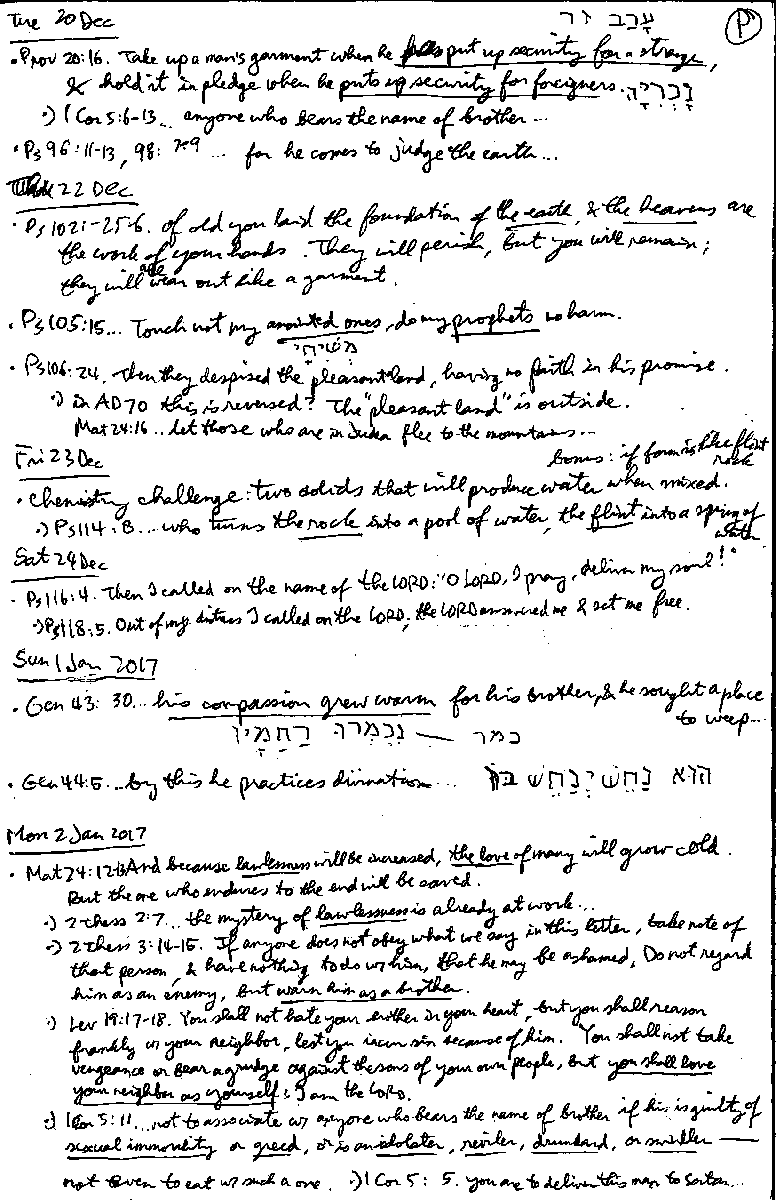

In [12]:
y = baseimage.getdata()
y = np.array(y)
cutoff = 235
y[y <= cutoff] = 0
y[y > cutoff] = 255
y = np.reshape(y, (baseimage.size[1], baseimage.size[0])).astype('uint8')
Image.fromarray(y)

In [13]:
df = pd.DataFrame(base)
df.describe()

,0
count,931200.000000
mean,236.015129
std,56.963481
min,0.000000
25%,255.000000
50%,255.000000
75%,255.000000
max,255.000000


In [14]:
df[0].value_counts()

255    729085
254     26059
253     19505
249      8816
252      8696
0        8486
251      7168
250      6105
248      3549
245      3305
247      2754
246      2365
1        2087
2        1713
241      1386
244      1382
243      1066
242       960
3         899
237       825
4         815
7         786
10        765
6         759
8         742
54        740
27        737
59        737
53        732
20        730
        ...  
190       244
157       244
164       243
179       240
170       238
150       236
174       235
161       232
160       226
31         78
12         75
38         74
5          69
46         68
28         67
74         65
56         65
51         65
9          63
61         62
19         60
35         60
14         57
67         56
25         55
17         54
22         52
42         52
83         36
95         34
Name: 0, Length: 256, dtype: int64

In [15]:
df.quantile(.1)

0    197.0
Name: 0.1, dtype: float64

In [17]:
# Render plots inline
plt.rcParams['figure.figsize'] = (15, 5)
x = df.sort_values(0)

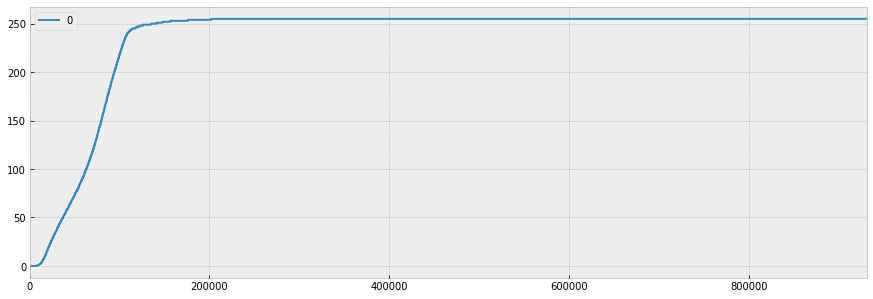

In [18]:
y = x.reset_index().drop('index', 1)
y.plot()